# DATA ENGINEERING: Stock Prediction

* HCMUT-VNU
* Semester: 231
* Group 17

# 0. Description

# 1. Data fields

There are some data fields that VN30 provided. They are described as below:

+ Ngày: Gồm ngày tháng năm cụ thể.

+ Lần cuối: Hay còn gọi là "Giá đóng"(close price), có nghĩa là giá cổ phiếu của phiên giao dịch cuối của ngày đó.

+ Mở: Hay còn gọi là "Giá mở"(open price), có nghĩa là giá cổ phiếu của phiên giao dịch đầu của ngày đó.

+ Cao: Hay còn gọi là "Giá trần", có nghĩa là giá cổ phiếu cao nhất trong ngày.

+ Thấp: Hay còn gọi là "Giá sàn", có nghĩa là giá cổ phiếu thấp nhất trong ngày.

+ KL: Số lượng giao dịch trong ngày của cổ phiếu.

+ % Thay đổi: Phần trăm thay đổi của giá sàn của ngày hôm sau so với ngày hiện tại.


Also, there are some fields that we can derive:

## RSI 
- Đây là "Chỉ số sức mạnh tương đối"(Relevant Strength Index) là giá trị phản ánh tình trạng quá "mua" hoặc quá "bán" trên thị trường. Có công thức như sau:

$$RSI=100-[\dfrac{100}{1+\dfrac{\text{Mức tăng trung bình}}{\text{Tổn thất trung bình}}}]$$

- Giá trị của RSI được biểu diễn trong khoảng từ 0 đến 100. Thông thường:

    + Nếu RSI > 70, thì cổ phiếu đang bị mua quá mức dẫn đến việc xu hướng tăng của giá trị cổ phiếu có khả năng bị giảm và xu hướng giảm có khả năng tăng.

    + Nếu RSI < 30, thì cổ phiếu đang bị bán quá mức dẫn đến giá trị cổ phiếu gần chạm đáy và chuẩn bị tăng.
    
    + Nếu RSI giữa khoảng (30,70) được coi là trung tính. Ví dụ với mức RSI=50 thì xem là không có xu hướng.

- Bên cạnh việc thể hiện tình trạng quá bán hoặc quá mua, nhà đầu tư cũng có thể sử dụng phân kỳ RSI để dự đoán xu hướng đảo chiều. Sự phân kỳ xảy ra khi giá chứng khoán di chuyển theo hướng ngược lại so với các chỉ báo kỹ thuật. Điều này cảnh báo xu hướng giá hiện tại có thể đang suy yếu và nguy cơ dẫn đến sự thay đổi hướng của giá. Trong đó có hai loại là phân kỳ âm và phân kỳ dương:

    + Phân kỳ dương: RSI tăng tạo đáy cao trong khi giá giảm tạo đáy thấp, cảnh báo đà tăng mạnh bất chấp xu hướng giá giảm.

    + Phân kỳ âm: RSI giảm và tạo đỉnh thấp trong khi giá tài sản tăng tạo đỉnh cao hơn, cảnh báo giá có thể giảm mạnh.


## EMA

- Đây là "Đường trung bình động luỹ thừa"(Exponent Moving Average). Nó được dùng để phản ánh sự biến động giá được tính theo cấp số nhân, qua đó giúp nhà đầu tư xác định được sự biến động giá một cách chuẩn xác hơn và giảm thiểu được tình trạng nhiễu giá so với đường trung bình động thông thường. 

- Có công thức:

$$\text{EMA}(t)=P(t) \times K + \text{EMA}(t-1) \times (1-K)$$

- Với:

    + $P(t)$: giá đóng của cổ phiếu ở ngày t.
 
    + $K=\dfrac{2}{1+N}$: hệ số làm trơn, được tính bằng công thức đính kèm với N là chu kì (ví dụ như 5 ngày, 10 ngày,...).
 
    + EMA(t): giá trị EMA tại ngày t.

- Sự di chuyển của đường EMA phản ánh xu hướng dịch chuyển của giá, thông qua đó nhà đầu tư nắm bắt tình hình xu hướng giá ngay thời điểm hiện tại.

- Đường EMA dốc lên thể hiện giá đang đi lên, thị trường trong xu hướng tăng. Ngược lại, đường EMA dốc xuống thể hiện giá đang đi xuống, thị trường trong xu hướng giảm. Đường EMA nằm ngang đồng nghĩa với giá cũng đi ngang, thị trường trong trạng thái sideway.

- EMA được theo 3 khung thời gian gồm có:

    + EMAF: EMA nhanh, thường tương ứng với các chu kỳ nhỏ.
    
    + EMAM: EMA trung bình, thường tương ứng với các chu kỳ trung bình.
    + EMAS: EMA chậm, thường tương ứng với chu kỳ lớn.

- Dựa vào sự cắt nhau của các đường EMAF, EMAM, EMAS và đường giá, ta sẽ xác định được xu hướng tăng hoặc giảm của cổ phiếu đó.

# 2. Data processing

### Import Libraries

In [1]:
# !pip3 install numpy matplotlib yfinance
# !pip3 install -U git+https://github.com/twopirllc/pandas-ta.git@development

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import pandas_ta as ta
import yfinance as yf

### Import VN30 data

In [3]:
data = pd.read_csv('VN30_031023-031013.csv') # there are no null values in this CSV file
data.head(5)

,Date,Close,Open,High,Low,Vol,Percentage Change
0,03/10/2023,"1,130.89","1,156.86","1,158.38","1,128.54",260.26K,-3.11%
1,02/10/2023,"1,167.13","1,166.64","1,173.06","1,159.16",119.87K,0.07%
2,29/09/2023,"1,166.26","1,169.26","1,176.77","1,165.15",144.90K,0.16%
3,28/09/2023,"1,164.45","1,167.96","1,168.09","1,144.47",193.65K,-0.36%
4,27/09/2023,"1,168.60","1,154.54","1,168.60","1,141.09",190.47K,1.32%


### As we can see, our VN30 data is being reversed

In [4]:
data = data.iloc[::-1]
data.reset_index(drop=True, inplace=True)
data

,Date,Close,Open,High,Low,Vol,Percentage Change
0,03/10/2013,549.58,552.41,552.66,548.44,19.12K,-0.57%
1,04/10/2013,552.07,549.74,552.27,548.63,17.85K,0.45%
2,07/10/2013,557.54,552.55,557.95,552.30,22.80K,0.99%
3,08/10/2013,558.55,557.83,560.36,555.02,29.15K,0.18%
4,09/10/2013,556.72,558.24,558.99,555.25,17.70K,-0.33%
...,...,...,...,...,...,...,...
2491,27/09/2023,"1,168.60","1,154.54","1,168.60","1,141.09",190.47K,1.32%
2492,28/09/2023,"1,164.45","1,167.96","1,168.09","1,144.47",193.65K,-0.36%
2493,29/09/2023,"1,166.26","1,169.26","1,176.77","1,165.15",144.90K,0.16%
2494,02/10/2023,"1,167.13","1,166.64","1,173.06","1,159.16",119.87K,0.07%


### Get data types:

In [5]:
data.dtypes

Date                 object
Close                object
Open                 object
High                 object
Low                  object
Vol                  object
Percentage Change    object
dtype: object

As we can see, **Open**, **Close**, **High**, **Low** price got the same string format, but how about **Vol** ?

In [6]:
data['Vol'].str[-1].value_counts()

Vol
K    2491
M       5
Name: count, dtype: int64

There are 2 different values in **Vol**.

Convert data types:

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')


data['Close'] = pd.to_numeric(data['Close'].str.replace(',',''))
data['Open'] = pd.to_numeric(data['Open'].str.replace(',',''))
data['High'] = pd.to_numeric(data['High'].str.replace(',',''))
data['Low'] = pd.to_numeric(data['Low'].str.replace(',',''))

# data['Vol'] = data['Vol'].str.replace('K', '')
# data['Vol'] = (pd.to_numeric(data['Vol'])*1000)

data['Percentage Change'] = data['Percentage Change'].str.replace('%', '')
data['Percentage Change'] = pd.to_numeric(data['Percentage Change']) # if null then NaN

# data.head()

In [8]:
# for i in range(len(data['Vol'])):
#     if data['Vol'].loc[i][-1] == 'K':
#         data['Vol'].loc[i] = data['Vol'].loc[i].replace('K','')
#         # print(data['Vol'].loc[i] )
#         data['Vol'].loc[i] = int(float(data['Vol'].loc[i])*1000)
#     else: 
#         data['Vol'].loc[i] = data['Vol'].loc[i].replace('M','')
#         data['Vol'].loc[i] = int(float(data['Vol'].loc[i])*1000000)

In [9]:
# data['Vol'] = data['Vol'].astype(int)
# data.head(5)

In [10]:
data.dtypes

Date                 datetime64[ns]
Close                       float64
Open                        float64
High                        float64
Low                         float64
Vol                          object
Percentage Change           float64
dtype: object

### Number of record of each year from 03/10/2013 to 203/10/2023:

In [11]:
for i in range (2013,2024):
    print(i,data[data['Date'].dt.year==i].size)

2013 448
2014 1729
2015 1736
2016 1757
2017 1750
2018 1743
2019 1750
2020 1764
2021 1750
2022 1743
2023 1302


In [12]:
data.head()

,Date,Close,Open,High,Low,Vol,Percentage Change
0,2013-10-03,549.58,552.41,552.66,548.44,19.12K,-0.57
1,2013-10-04,552.07,549.74,552.27,548.63,17.85K,0.45
2,2013-10-07,557.54,552.55,557.95,552.30,22.80K,0.99
3,2013-10-08,558.55,557.83,560.36,555.02,29.15K,0.18
4,2013-10-09,556.72,558.24,558.99,555.25,17.70K,-0.33


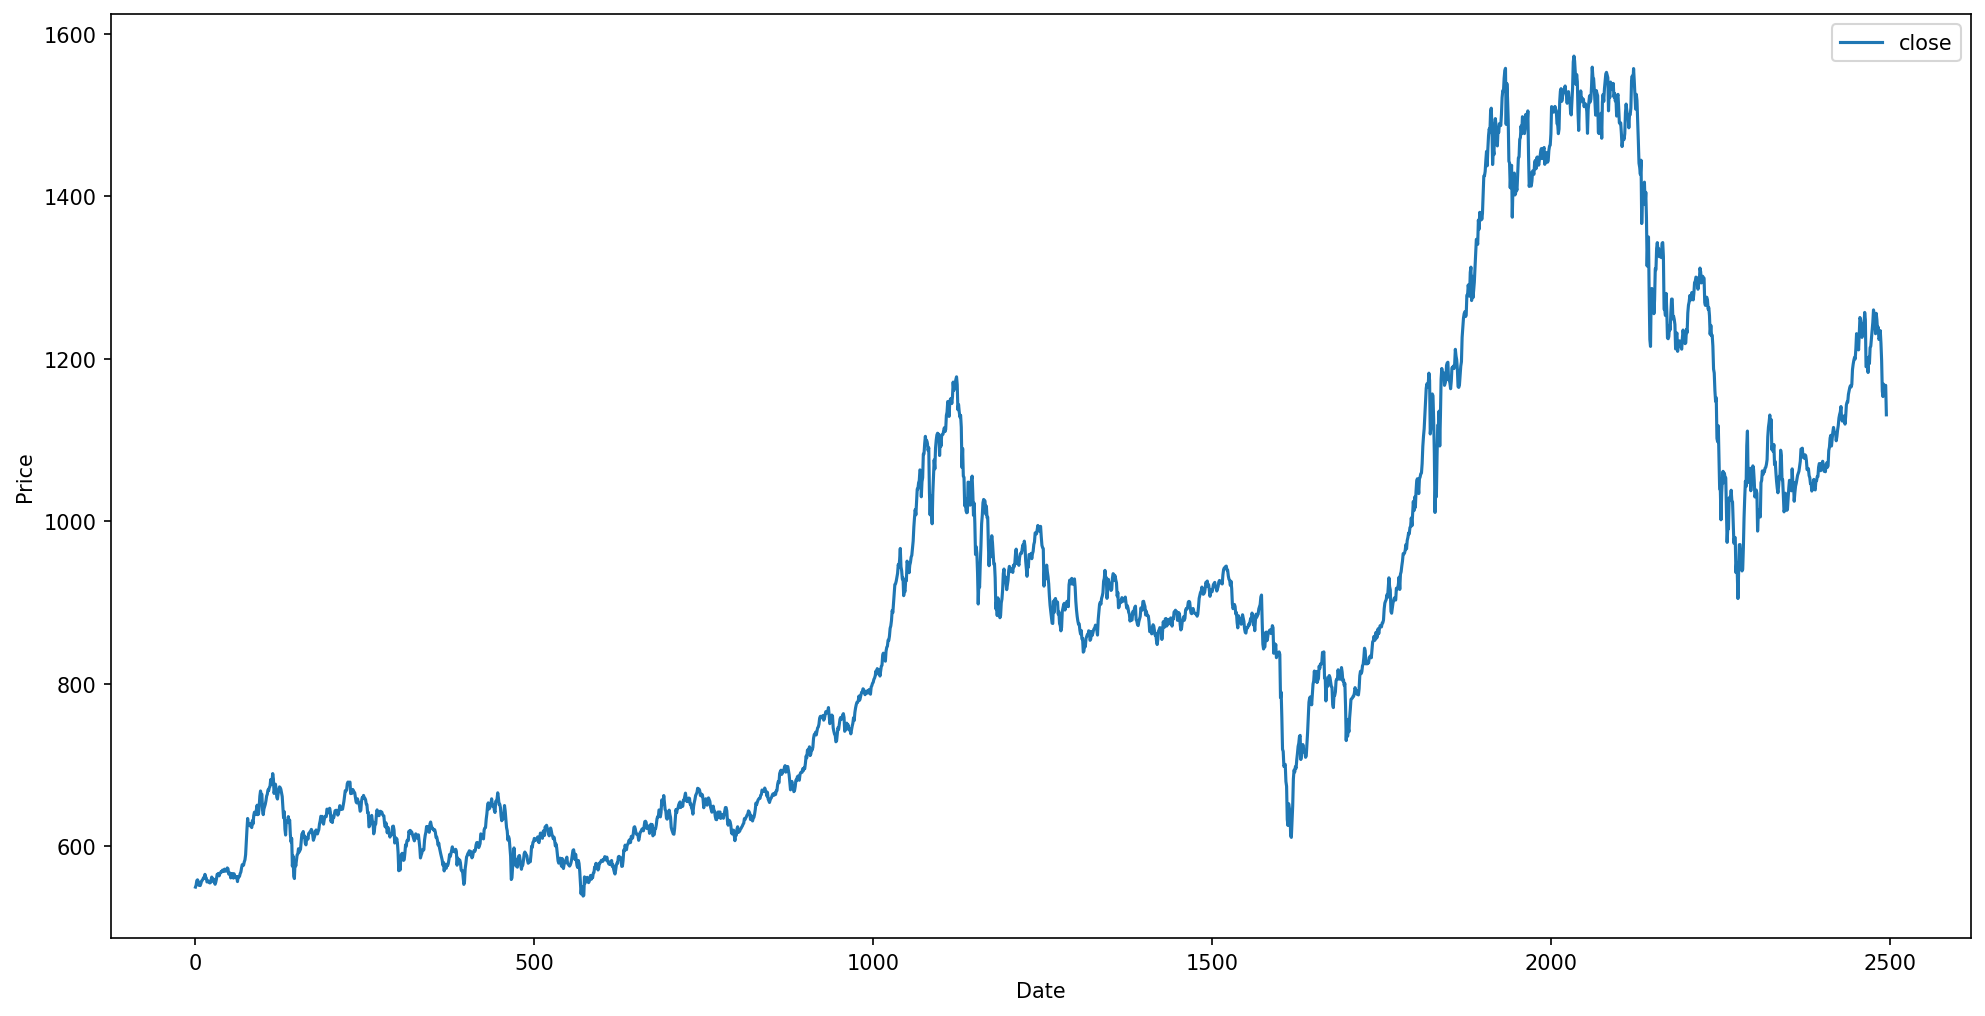

In [13]:
plt.figure(figsize=(16, 8), dpi=150) 

data['Close'].plot(x=data['Date'],label='close')
# data['High'].plot(x=data['Date'],label='high')
# data['Low'].plot(x=data['Date'],label='low')

# data['Open'].plot(label='open')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 

### Add indicators

In [14]:
# data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
# data.dtypes

In [15]:
data['RSI'] = ta.rsi(data.Close, length=15)
data['EMAF'] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length=100)
data['EMAS'] = ta.ema(data.Close, length=150)

'''
Target: Boolean value, 0 if the next closing price smaller than the current closing price.
'''
data['Target'] = (data['Close'] - data.Open).shift(-1) 

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Close'].shift(-1)
data.head()

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Vol', 'Date', "Percentage Change", "index"], axis=1, inplace=True)

In [16]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,581.93,573.63,582.69,569.91,38.511591,604.586251,615.209193,602.308267,6.77,1,589.31
1,589.31,582.54,590.50,577.93,41.530649,603.131370,614.696338,602.136104,3.92,1,590.27
2,590.27,586.35,590.61,581.61,41.928044,601.906478,614.212648,601.978937,6.13,1,596.82
3,596.82,590.69,597.78,585.10,44.676793,601.422051,613.868239,601.910607,-2.52,0,592.75
4,592.75,595.27,600.15,592.75,43.311919,600.596142,613.450056,601.789274,0.67,1,594.35
5,594.35,593.68,597.43,591.77,44.032095,600.001271,613.071837,601.690741,2.20,1,596.24
6,596.24,594.04,597.80,588.05,44.917747,599.643055,612.738533,601.618546,9.86,1,605.87
7,605.87,596.01,606.02,595.38,49.297794,600.236097,612.602523,601.674856,6.63,1,614.88
8,614.88,608.25,615.46,608.25,53.041031,601.630755,612.647621,601.849759,0.80,1,615.01
9,615.01,614.21,622.35,611.75,53.094564,602.904968,612.694401,602.024067,3.68,1,618.00


### Scale data by Scikit MinMaxScaler

In [17]:
# !pip3 install scikit-learn

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
data_set = scaler.fit_transform(data)

In [20]:
print(data_set)

[[0.04197576 0.03119264 0.03856979 ... 0.58307661 1.         0.04911358]
 [0.04911358 0.03979984 0.04604633 ... 0.56356541 1.         0.05004207]
 [0.05004207 0.04348036 0.04615164 ... 0.57869515 1.         0.05637712]
 ...
 [0.60537947 0.60532468 0.59897568 ... 0.51619087 0.         0.60713008]
 [0.60713008 0.6065805  0.60728509 ... 0.54008352 1.         0.60797153]
 [0.60797153 0.60404954 0.60373349 ... 0.3589375  0.         0.5729208 ]]


### Create Data for training and testing

* X: Input set
* Y: Output set

In [21]:
X = []
# print(data_set[0].size) # => 11
backcandles = 10
# print(data_set.shape[0]) # => 2346

# get all columns except "Target",	"TargetClass",	"TargetNextClose"
for i in range(8):
    X.append([])
    for j in range(backcandles, data_set.shape[0]):
        X[i].append(data_set[j-backcandles:j,i]) # get each "backcandles" element from each column.

print("0:",X[0][0:1]) # first candle set of Close Price
print("1:",X[1][0:1]) # first candle set of Open Price


0: [array([0.04197576, 0.04911358, 0.05004207, 0.05637712, 0.05244069,
       0.05398818, 0.05581616, 0.06513013, 0.07384446, 0.07397019])]
1: [array([0.03119264, 0.03979984, 0.04348036, 0.04767287, 0.05209722,
       0.05056126, 0.05090902, 0.05281207, 0.0646361 , 0.07039355])]


In [22]:
X = np.moveaxis(X,[0],[2]) # Transposition

In [23]:
X[0][:3]

array([[0.04197576, 0.03119264, 0.03856979, 0.03704133, 0.3407446 ,
        0.04483376, 0.03819386, 0.02013632],
       [0.04911358, 0.03979984, 0.04604633, 0.04478159, 0.37861858,
        0.04333934, 0.03764111, 0.01994611],
       [0.05004207, 0.04348036, 0.04615164, 0.04833324, 0.38360389,
        0.04208117, 0.03711979, 0.01977246]])

In [24]:
X = np.array(X)
y = np.reshape(np.array(data_set[backcandles:,-3]), (len(np.array(data_set[backcandles:,-3])),1))# LSTM got output from "backcandle"
# 1 col, with len(X)-backcandles rows

In [25]:
print("Shape",y.shape)
print(y)

Shape (2336, 1)
[[0.51105634]
 [0.54617649]
 [0.47415623]
 ...
 [0.51619087]
 [0.54008352]
 [0.3589375 ]]


### Split data

In [26]:
splitlimit = int(len(X)*0.8)
print("Split lim:",splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print("Xtrain shape",X_train.shape)
print("Xtest shape",X_test.shape)
print("ytrain",y_train.shape)
print("ytest",y_test.shape)
print("ytrain:\n",y_train)

Split lim: 1868
Xtrain shape (1868, 10, 8)
Xtest shape (468, 10, 8)
ytrain (1868, 1)
ytest (468, 1)
ytrain:
 [[0.51105634]
 [0.54617649]
 [0.47415623]
 ...
 [0.62559047]
 [0.49921271]
 [0.4690217 ]]


# 3. LSTM Model

### Import Libraries

In [27]:
# !pip3 install keras tensorflow

In [28]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

2023-11-04 21:17:01.648508: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Layers

In [29]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(100, name='first_layer')(lstm_input)  
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
113/113 [==============================] - 5s 15ms/step - loss: 0.0203 - val_loss: 0.0163
Epoch 2/30
113/113 [==============================] - 1s 6ms/step - loss: 0.0051 - val_loss: 0.0140
Epoch 3/30
113/113 [==============================] - 1s 7ms/step - loss: 0.0046 - val_loss: 0.0157
Epoch 4/30
113/113 [==============================] - 1s 6ms/step - loss: 0.0043 - val_loss: 0.0127
Epoch 5/30
113/113 [==============================] - 1s 7ms/step - loss: 0.0044 - val_loss: 0.0125
Epoch 6/30
113/113 [==============================] - 1s 7ms/step - loss: 0.0042 - val_loss: 0.0132
Epoch 7/30
113/113 [==============================] - 1s 7ms/step - loss: 0.0043 - val_loss: 0.0133
Epoch 8/30
113/113 [==============================] - 1s 10ms/step - loss: 0.0042 - val_loss: 0.0121
Epoch 9/30
113/113 [==============================] - 1s 10ms/step - loss: 0.0042 - val_loss: 0.0121
Epoch 10/30
113/113 [==============================] - 1s 7ms/step - loss: 0.0043 - val_loss: 0.0

# 4. Results

In [30]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 3ms/step
[0.4755009] [0.54980489]
[0.47487184] [0.40685972]
[0.47469383] [0.48606832]
[0.47340283] [0.63154652]
[0.47327372] [0.63757103]
[0.47378397] [0.74498528]
[0.47444478] [0.53104676]
[0.4754942] [0.46847402]
[0.47484764] [0.61764907]
[0.4747399] [0.33237489]


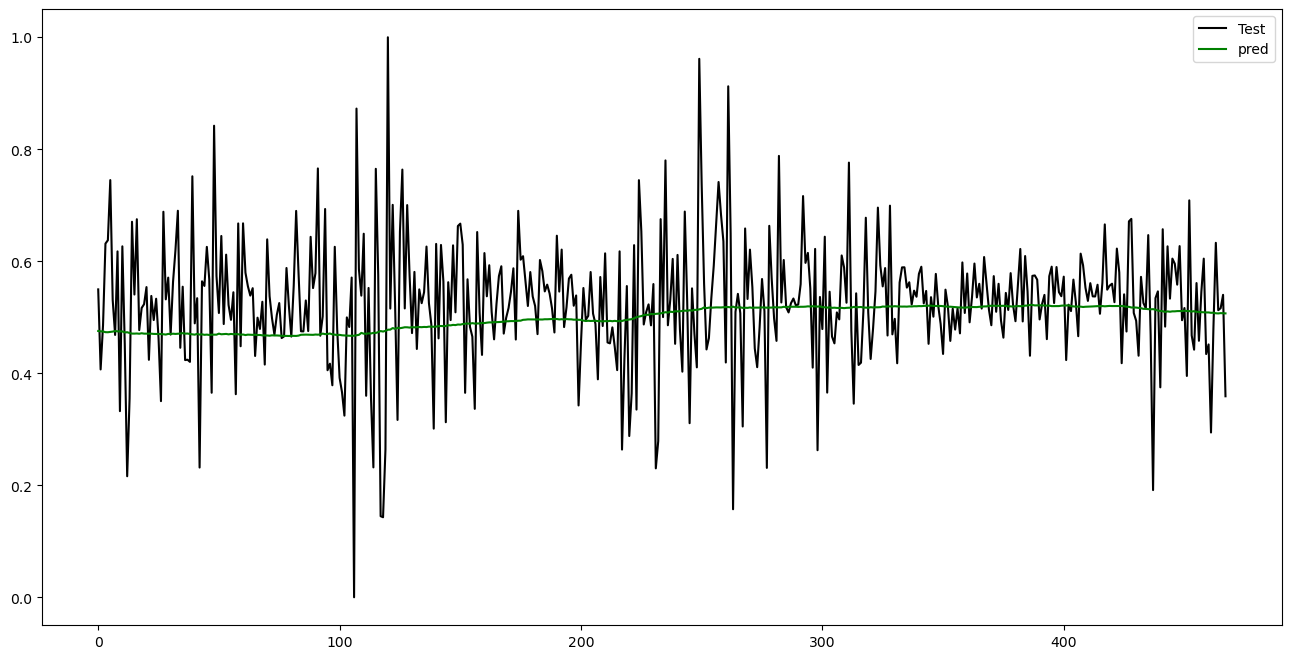

In [31]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

# 5. References
1. https://vnexpress.net/chi-bao-rsi-la-gi-4481781.html